In [ ]:
import sys
import subprocess

for module in ["networkx", "matplotlib", "plotly"]:
    try:
        __import__(module)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", module])

In [35]:
# Day 1: Core Skills for Visualizing Algorithms and Complex Systems
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import networkx as nx
from IPython.display import HTML
# Task 1: Visualizing Bubble Sort
def bubble_sort_visualize(arr):
    fig, ax = plt.subplots()
    bar_rects = ax.bar(range(len(arr)), arr, align="center", color="blue")
    ax.set_ylim(0, max(arr) + 1)

    def update(arr):
        for bar, height in zip(bar_rects, arr):
            bar.set_height(height)

    def bubble_sort_gen(arr):
        arr = arr.copy()
        for i in range(len(arr)):
            for j in range(len(arr) - i - 1):
                if arr[j] > arr[j + 1]:
                    arr[j], arr[j + 1] = arr[j + 1], arr[j]
                    yield arr

    ani = animation.FuncAnimation(fig, update, frames=bubble_sort_gen(arr), repeat=False, save_count=len(arr)**2)
    plt.close(fig)
    return ani


In [36]:
# Example Array
arr = [8, 3, 6, 2, 5, 1, 7, 4]
ani = bubble_sort_visualize(arr)
HTML(ani.to_jshtml())

In [12]:
# Task 2: Visualizing Binary Search Tree
def visualize_binary_tree(edges):
    G = nx.DiGraph()
    G.add_edges_from(edges)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, font_size=10)
    plt.title("Binary Search Tree Traversal")
    plt.show()


In [39]:
# animation by HTML
def animate_binary_tree(edges):
    G = nx.DiGraph()
    fig, ax = plt.subplots()
    pos = nx.spring_layout(G)

    def update(frame):
        ax.clear()
        edge = edges[frame]
        G.add_edge(*edge)
        pos = nx.spring_layout(G)
        nx.draw(
            G, pos, ax=ax, with_labels=True, node_color="lightblue", 
            node_size=700, font_size=10, arrowsize=15
        )
        ax.set_title(f"Adding edge: {edge}", fontsize=12)

    ani = animation.FuncAnimation(
        fig, update, frames=range(len(edges)), repeat=False, interval=1000
    )
    plt.close(fig)
    return ani


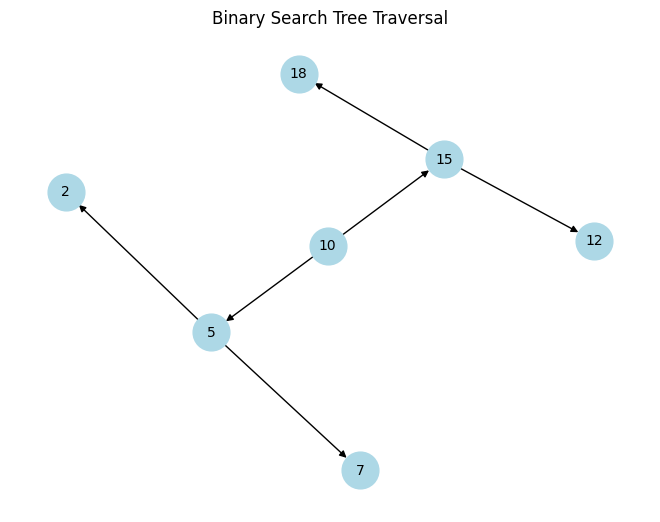

In [41]:
# Example Binary Tree Edges
edges = [(10, 5), (10, 15), (5, 2), (5, 7), (15, 12), (15, 18)]
visualize_binary_tree(edges)

In [40]:
ani_bir = animate_binary_tree(edges)
HTML(ani_bir.to_jshtml())